# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I. In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I of the Lab.  

## Task - 1

In [2]:
from os import environ as env
import keystoneclient.v3.client as ksclient
from keystoneauth1.identity import v3
from keystoneauth1 import loading
from keystoneauth1 import session
import time, os, sys
import inspect
from os import environ as env
from novaclient import client
from statistics import mean


To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [3]:
keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

Next command will collect all the available endpoints in keystone.

In [4]:
endpoints = keystone.service_catalog.get_endpoints()

Next section will print the services with associated infromation.

In [5]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == ('public' or 'internal') :
            print ('service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url'])

service:  compute , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8774/v2.1
service:  identity , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:5000
service:  cloudformation , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8000/v1
service:  orchestration , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  network , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9696
service:  volumev3 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v3/fc1aade83c2e49baa7498b3918560d9f
service:  image , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9292
service:  metric , region:  east-1 , public endpoint:  https://130.238.28.5:8041
service:  placement , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8780
service:  volumev2 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v2/fc1aade83c

## Questions:

1. **Explain the working of the code?**  

A keystone client with the API's environment variables is created. After that, the endpoints are taken and interfaces with internal or public interfaces are printed.



2. **Why we need openrc file to run this code?**  

The file needs to be sourced so that the Variables (as OS_AUTH_URL) are set.

3. **The code shows information about the "public" endpoints. Modify the code to show both the "public" and "internal" endpoints?**  

Done, look above.

4. **What is the difference between "internal" and "public" endpoints?**  

*Internal endpoints* are used for instance-to-instance communication. It can be used for http, tcp, udp, and any.  *External endpoints* are used to access the instance from outside the cluster.


## Task - 2

In this task you need to write a small python program using Keystone and Nova APIs to list all the available VMs in the project. 

Use the following links and the code available in Task-1. 

https://docs.openstack.org/python-novaclient/pike/   
https://docs.openstack.org/python-novaclient/pike/reference/api/index.html


In [6]:
print(env['OS_AUTH_URL'])

https://east-1.cloud.snic.se:5000/v3


In [7]:

flavor = "ssc.xsmall"
private_net = 'UPPMAX 2020/1-2 Internal IPv4 Network' #192.168.2.141
floating_ip_pool_name = None # limited amount of resources, that's why we don't use it.
floating_ip = None #130.238.29.102
image_name = 'Ubuntu 18.04'

loader = loading.get_plugin_loader('password')

# the UPPMAX.rc needs to be sourced for this
auth = loader.load_from_options(auth_url=env['OS_AUTH_URL'],
                                username=env['OS_USERNAME'],
                                password=env['OS_PASSWORD'],
                                project_name=env['OS_PROJECT_NAME'],
                                project_domain_name=env['OS_USER_DOMAIN_NAME'],
                                project_id=env['OS_PROJECT_ID'],
                                user_domain_name=env['OS_USER_DOMAIN_NAME'])

sess = session.Session(auth=auth)
nova = client.Client('2.1', session=sess)
print ("user authorization completed.")

nova.servers.list()



user authorization completed.


[<Server: Henkeinst-200922L>,
 <Server: wezh_lab2>,
 <Server: shreyas_spark>,
 <Server: yudu_lab11>,
 <Server: shreyas_ansible>,
 <Server: Stina_2>,
 <Server: li-ju-python>,
 <Server: Ellinor_c2>,
 <Server: dani_lab2_inst3>,
 <Server: Henkeinst-200922>,
 <Server: max_soneback_docker>,
 <Server: vmTabeaDocker>,
 <Server: maha_c2>,
 <Server: li-ju>,
 <Server: Julie-Lab2>,
 <Server: ray_stack_1-my_instance0-34bqo55nod4d>,
 <Server: ray_stack_1-my_instance1-qzdarbz7ys2x>,
 <Server: stack_with_init_script-my_instance0-fxeamr6khcgk>,
 <Server: stack_with_init_script-my_instance1-wnj3b3ns7jty>,
 <Server: saria_azam2>,
 <Server: sotiris_stack-my_instance1-jeeti32nenm3>,
 <Server: sotiris_stack-my_instance0-5nhxvbbcvnx4>,
 <Server: Raheel2>,
 <Server: ahameed1>,
 <Server: Ego_Ass2>,
 <Server: Kev-instance>,
 <Server: mj-docker>,
 <Server: task5vm_test>,
 <Server: Salman Toor>,
 <Server: dapi_vm1>,
 <Server: lisa_vm1>,
 <Server: lisa_vm1>,
 <Server: saria_azam>,
 <Server: girish_vm1>,
 <Server: 

## Same exercise, but not using loading:

In [8]:
# Set variables
auth_url = env['OS_AUTH_URL']
username=env['OS_USERNAME']
password=env['OS_PASSWORD']
project_id=env['OS_PROJECT_ID']
user_domain_name = env['OS_USER_DOMAIN_NAME']
project_name = env['OS_PROJECT_NAME']
project_domain_name = 'Default'


# Create the auth object:
auth = v3.Password(auth_url=auth_url,
                   username=username,
                   password=password,
                   project_id=project_id,
                   user_domain_name=user_domain_name)
sess = session.Session(auth=auth)

keystone = ksclient.Client(session=sess)

# Create Nova Client Object:
nova = client.Client(2, session=keystone.session)

# Print the Vms:                
nova.servers.list()


[<Server: Henkeinst-200922L>,
 <Server: wezh_lab2>,
 <Server: shreyas_spark>,
 <Server: yudu_lab11>,
 <Server: shreyas_ansible>,
 <Server: Stina_2>,
 <Server: li-ju-python>,
 <Server: Ellinor_c2>,
 <Server: dani_lab2_inst3>,
 <Server: Henkeinst-200922>,
 <Server: max_soneback_docker>,
 <Server: vmTabeaDocker>,
 <Server: maha_c2>,
 <Server: li-ju>,
 <Server: Julie-Lab2>,
 <Server: ray_stack_1-my_instance0-34bqo55nod4d>,
 <Server: ray_stack_1-my_instance1-qzdarbz7ys2x>,
 <Server: stack_with_init_script-my_instance0-fxeamr6khcgk>,
 <Server: stack_with_init_script-my_instance1-wnj3b3ns7jty>,
 <Server: saria_azam2>,
 <Server: sotiris_stack-my_instance1-jeeti32nenm3>,
 <Server: sotiris_stack-my_instance0-5nhxvbbcvnx4>,
 <Server: Raheel2>,
 <Server: ahameed1>,
 <Server: Ego_Ass2>,
 <Server: Kev-instance>,
 <Server: mj-docker>,
 <Server: task5vm_test>,
 <Server: Salman Toor>,
 <Server: dapi_vm1>,
 <Server: lisa_vm1>,
 <Server: lisa_vm1>,
 <Server: saria_azam>,
 <Server: girish_vm1>,
 <Server: 

## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several times to gather statistic and plot 

a) A estimated distribution of the time taken (in wall clock) to write and read a file of size 10MB in your volume and   
b) vary the size of the file from 10kB to 100MB and plot the read and write throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting graphs and a description of your experiment in the report.

In [63]:
import matplotlib.pyplot as plt
import shutil
import time 
import os


# get files to copy
filenames = ["10K", "50K", "100K", "500K", "10M", "50M", "100M"]
filenames = [f + ".txt" for f in filenames]

# initialise the dictionary to save the copy time
copy_time_instToVol = {}
copy_time_volToInst = {}
for val in filenames:
    copy_time_volToInst.setdefault(val, [])
    copy_time_instToVol.setdefault(val, [])


for i in range(0,10):
    for filename in filenames:
        start = time.time()
        shutil.copy(f'/mnt/{filename}', '/home/ubuntu/speed')
        diff = time.time() - start
        copy_time_volToInst[filename].append(diff)

for i in range(0,10):
    for filename in filenames:
        start = time.time()
        shutil.copy(f'/home/ubuntu/speed/{filename}', f'/mnt/test')
        diff = time.time() - start
        copy_time_instToVol[filename].append(diff)
        

avg = {}
for key,vals in copy_time_instToVol.items():
    avg[key] = mean(vals)

avg2={}
for key,vals in copy_time_volToInst.items():
    avg2[key] = mean(vals)
    
# access files in the virtual machine
# want to see to attach another volume, mount it somewhere. Create files of different sizes, transfer those files 
# to different volumes.
# Plot the results




['10K.txt', '50K.txt', '100K.txt', '500K.txt', '10M.txt', '50M.txt', '100M.txt']


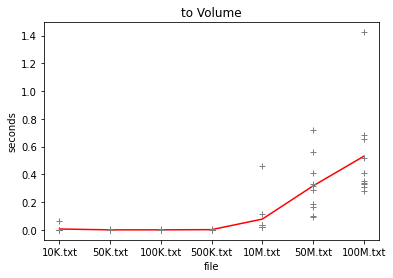

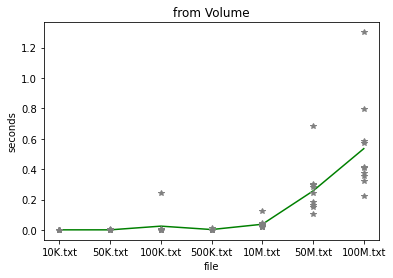

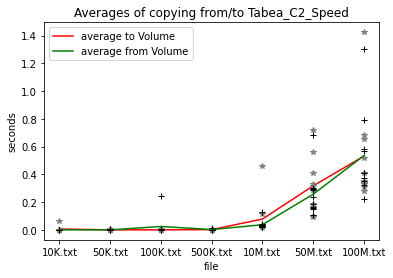

In [64]:
plt.plot(*zip(*avg.items()),  c='red', label = 'average to Volume')
plt.plot(*zip(*copy_time_instToVol.items()), '+', c='grey')
plt.ylabel("seconds")
plt.xlabel("file")
plt.title("to Volume")
plt.show()


plt.plot(*zip(*avg2.items()),  c='green',  label = 'average from Volume')
plt.plot(*zip(*copy_time_volToInst.items()), '*', c='grey')
plt.ylabel("seconds")
plt.xlabel("file")
plt.title("from Volume")
plt.show()


    

plt.plot(*zip(*avg.items()),  c='red', label = 'average to Volume')
plt.plot(*zip(*copy_time_instToVol.items()), '*', c='grey')
plt.plot(*zip(*avg2.items()),  c='green', label = "average from Volume")
plt.plot(*zip(*copy_time_volToInst.items()), '+', c='black')

plt.ylabel("seconds")
plt.xlabel("file")
plt.title("Averages of copying from/to Tabea_C2_Speed")
plt.legend()
plt.show()


Don't foget to terminate resources after your experiments. 

In [ ]:
# Clean up volumes